In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta,date,time,timezone

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

## Importacion de datos

In [3]:
df_com = pd.read_csv("0_commercial_activity_df.csv", index_col="Unnamed: 0")
df_com = df_com.sort_values(by=["pk_cid", "pk_partition"])
df_com.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
4078994,15891,2018-07-28,2018-07-28,KAT,1.00,NaN
5319232,15891,2018-08-28,2018-07-28,KAT,0.00,02 - PARTICULARES
7451107,16063,2018-11-28,2018-11-19,KAT,1.00,NaN
8617948,16063,2018-12-28,2018-11-19,KAT,1.00,02 - PARTICULARES
9401149,16063,2019-01-28,2018-11-19,KAT,1.00,02 - PARTICULARES


In [4]:
df_socio = pd.read_csv("0_sociodemographic_df.csv",index_col="Unnamed: 0").sort_values(by=["pk_cid", "pk_partition"])
df_socio = df_socio.sort_values(by=["pk_cid", "pk_partition"])
df_socio.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
4078994,15891,2018-07-28,ES,28.00,H,59,N,NaN
5319232,15891,2018-08-28,ES,28.00,H,59,N,NaN
7451107,16063,2018-11-28,ES,28.00,H,62,N,NaN
8617948,16063,2018-12-28,ES,28.00,H,62,N,NaN
9401149,16063,2019-01-28,ES,28.00,H,62,N,NaN


In [5]:
df_prod = pd.read_csv("0_products_df.csv", index_col="Unnamed: 0")
df_prod = df_prod.sort_values(by=["pk_cid", "pk_partition"])
df_prod.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
4078994,15891,2018-07-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
5319232,15891,2018-08-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
7451107,16063,2018-11-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
8617948,16063,2018-12-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
9401149,16063,2019-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0


In [6]:
#creamos una lista con los productos para usar a futuro
lista_prod = pd.Index.to_list(df_prod.columns[2:])
lista_prod

['short_term_deposit',
 'loans',
 'mortgage',
 'funds',
 'securities',
 'long_term_deposit',
 'em_account_pp',
 'credit_card',
 'payroll',
 'pension_plan',
 'payroll_account',
 'emc_account',
 'debit_card',
 'em_account_p',
 'em_acount']

###  Merge de las 3 tablas

In [7]:
### visualizacion de datos
df_total = df_com.merge(df_socio, how="inner", on=["pk_cid", "pk_partition"]).merge(df_prod,how="inner", on=["pk_cid", "pk_partition"] )
df_total.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,15891,2018-07-28,2018-07-28,KAT,1.00,NaN,ES,28.00,H,59,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,15891,2018-08-28,2018-07-28,KAT,0.00,02 - PARTICULARES,ES,28.00,H,59,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
2,16063,2018-11-28,2018-11-19,KAT,1.00,NaN,ES,28.00,H,62,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
3,16063,2018-12-28,2018-11-19,KAT,1.00,02 - PARTICULARES,ES,28.00,H,62,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,16063,2019-01-28,2018-11-19,KAT,1.00,02 - PARTICULARES,ES,28.00,H,62,N,NaN,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0


## EDA

### Tamaño del dataset

In [8]:
# Tamaño del dataset
df_total.shape

(5962924, 27)

### Tipos de atributos

In [9]:
#Tipo de atributos
print(df_total.dtypes)

pk_cid                  int64
pk_partition           object
entry_date             object
entry_channel          object
active_customer       float64
segment                object
country_id             object
region_code           float64
gender                 object
age                     int64
deceased               object
salary                float64
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
dtype: object


In [10]:
#clasificar las variables en 3 tipos: categoricas, numericas y binarias, y ponerlas en una lista

def tipo_de_var(data):
    ''' dividir los tipos de varibales en 3 listas distintas: categóricas, numericas y binarias'''
    var_total = data.columns
    var_numericas = list(data._get_numeric_data().columns)
  
    var_binarias = []
    var_categoricas = list(set(var_total) - set(var_numericas))
    for i in var_numericas:
        if (data[str(i)].min() == 0 and data[str(i)].max() == 1) and data[str(i)].min()== 0:
    
           var_binarias.append(i)
    
    var_numericas = list(set(var_numericas)- set(var_binarias))

  
    return var_numericas,var_binarias,var_categoricas
    
var_numericas,var_binarias,var_categoricas = tipo_de_var(df_total)

In [11]:
print("variables numericas: " + str(len(var_numericas)))
print("variables binarias: " + str(len(var_binarias)))
print("variables categoricas: " + str(len(var_categoricas)))


variables numericas: 5
variables binarias: 15
variables categoricas: 7


### Estadísticos descriptivos

In [12]:
df_total.describe().T

,count,mean,std,min,25%,50%,75%,max
pk_cid,"5,962,924.00","1,234,929.80","162,302.04","15,891.00","1,112,532.00","1,231,097.00","1,352,339.00","1,553,689.00"
active_customer,"5,962,924.00",0.40,0.49,0.00,0.00,0.00,1.00,1.00
region_code,"5,960,660.00",25.81,13.60,1.00,13.00,28.00,36.00,52.00
age,"5,962,924.00",29.76,11.98,2.00,22.00,25.00,34.00,105.00
salary,"4,450,821.00","115,816.72","199,551.89","1,202.73","61,500.63","88,654.65","131,669.91","28,894,395.51"
short_term_deposit,"5,962,924.00",0.00,0.05,0.00,0.00,0.00,0.00,1.00
loans,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
mortgage,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
funds,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00
securities,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00


### Valores nulos

In [13]:
df_total.isna().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
dtype: int64

### Duplicados

In [14]:
#duplicados - no hay valores duplicados - cada fila es un cliente-fecha partition
df_total[df_total.duplicated(keep=False)]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


### Análisis Variables

##### pk_cid

In [15]:
#hay un total de 456,373 clientes
df_total["pk_cid"].nunique()

456373

In [16]:
#unos se repiten todos los meses, 17, y otros aparecen solo en un mes
df_total["pk_cid"].value_counts()

1284769    17
1225085    17
1225068    17
1225069    17
1225070    17
           ..
1436688     1
1436690     1
1436701     1
1436729     1
1553689     1
Name: pk_cid, Length: 456373, dtype: int64

##### pk_partition

In [17]:
df_total["pk_partition"].value_counts()

2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: pk_partition, dtype: int64

In [18]:
df_total['pk_partition'].nunique()

17

##### productos

<AxesSubplot:title={'center':'# de clientes por mes'}, xlabel='pk_partition'>

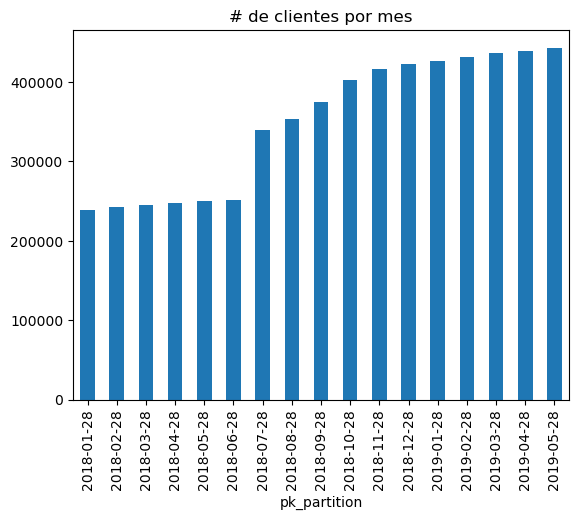

In [19]:
#para ver el numero total de clientes por cada mes
total_clientes= df_total.groupby(by="pk_partition")["pk_cid"].nunique()
total_clientes.plot(kind="bar", title="# de clientes por mes")

In [20]:
#productos totales y diferencia por mes
prod_total= pd.DataFrame(df_total.groupby(by="pk_partition")[lista_prod].sum())
prod_total["total"] = prod_total[lista_prod].sum(axis=1)
prod_total["diff"] = prod_total["total"]-prod_total["total"].shift(1)
prod_total

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,total,diff
pk_partition,,,,,,,,,,,,,,,,,
2018-01-28,883,19,15,786,932,4884,0,3325,"8,145.00","8,835.00",13478,15320,24696,2,215293,"296,613.00",NaN
2018-02-28,1343,19,15,872,965,4956,0,3282,"8,889.00","9,496.00",14246,15827,25448,2,217098,"302,458.00","5,845.00"
2018-03-28,1664,23,17,969,965,4965,0,3511,"9,735.00","9,882.00",14989,16428,27046,2,218683,"308,879.00","6,421.00"
2018-04-28,1740,24,17,1084,983,5107,0,3725,"9,905.00","10,560.00",15825,16947,27764,2,219816,"313,499.00","4,620.00"
2018-05-28,1455,27,18,1145,1012,5356,0,3797,"9,994.00","10,148.00",16697,17569,27911,2,221291,"316,422.00","2,923.00"
2018-06-28,1244,27,19,1159,1019,5588,0,4002,"10,946.00","11,635.00",15540,17950,28828,2,224328,"322,287.00","5,865.00"
2018-07-28,1282,28,20,1172,1053,5796,0,4137,"11,888.00","12,779.00",16916,18185,29578,2,234324,"337,160.00","14,873.00"
2018-08-28,1335,29,20,1219,1133,5923,0,4206,"11,383.00","12,126.00",18118,18333,29205,2,245980,"349,012.00","11,852.00"
2018-09-28,1386,31,20,1237,1201,6158,0,4289,"11,850.00","12,624.00",18862,18618,31684,2,261210,"369,172.00","20,160.00"


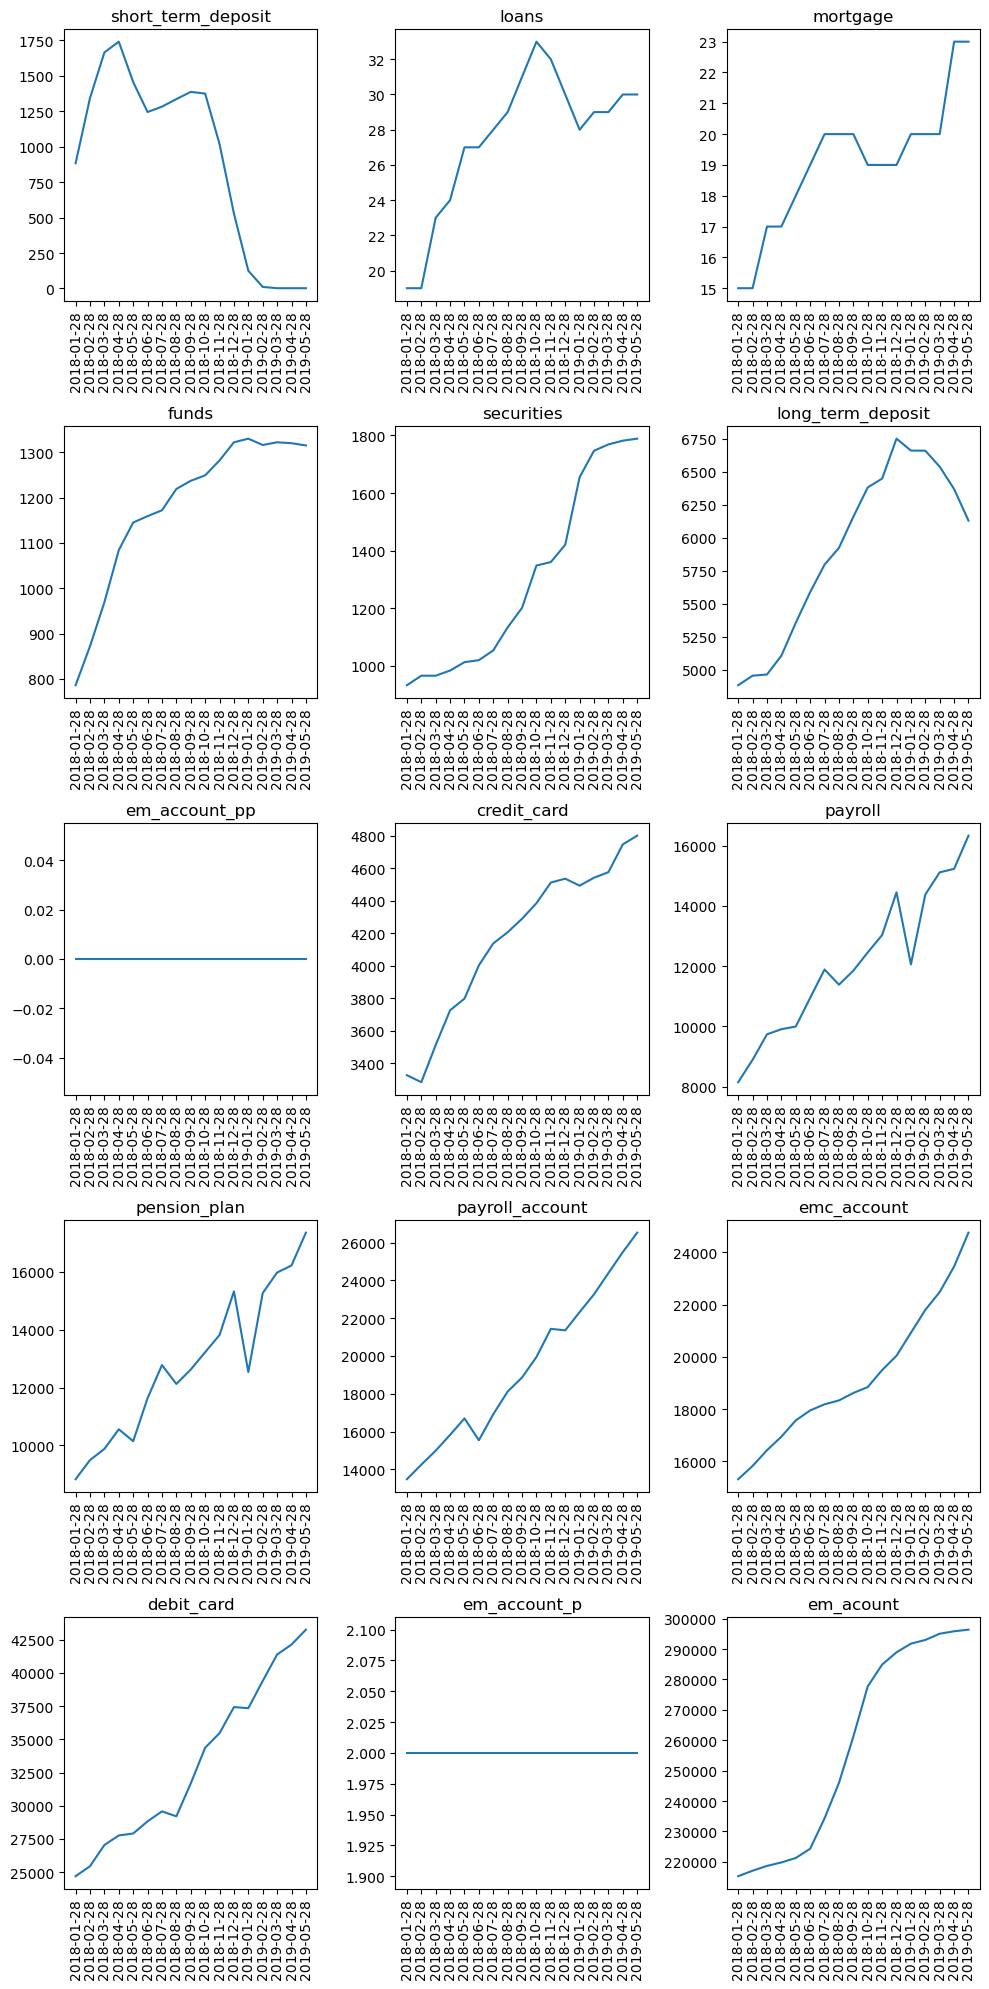

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 20))

for i, prod in enumerate(lista_prod):
    ax = axes[i // 3][i % 3]
    sns.lineplot(data=prod_total, x=prod_total.index, y=prod_total[prod], ax=ax)
    ax.set_title(prod)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', labelrotation=90)
plt.tight_layout()



plt.show()


##### Datos socioeconomicos

In [22]:
df_total_anal_ult = df_total[df_total['pk_partition'] == '2019-05-28'][['pk_partition','segment', 'country_id', 'region_code', 'gender', 'age', 'deceased', 'salary','entry_channel']]

In [23]:
df_total_anal_ult

,pk_partition,segment,country_id,region_code,gender,age,deceased,salary,entry_channel
8,2019-05-28,02 - PARTICULARES,ES,28.00,H,62,N,NaN,KAT
14,2019-05-28,01 - TOP,ES,8.00,V,70,N,NaN,KAT
23,2019-05-28,02 - PARTICULARES,ES,28.00,H,58,N,NaN,KHN
40,2019-05-28,02 - PARTICULARES,ES,28.00,H,54,N,"102,405.75",KAT
51,2019-05-28,02 - PARTICULARES,ES,28.00,V,55,N,"407,281.11",KAT
...,...,...,...,...,...,...,...,...,...
5962919,2019-05-28,NaN,ES,13.00,V,52,N,NaN,NaN
5962920,2019-05-28,NaN,ES,41.00,H,30,N,NaN,NaN
5962921,2019-05-28,NaN,ES,28.00,V,21,N,NaN,NaN
5962922,2019-05-28,NaN,ES,39.00,H,43,N,NaN,NaN


In [24]:
# Analizamos el entry channel
# Contar la frecuencia de cada valor en la columna 'entry_channel'
value_counts = df_total_anal_ult['entry_channel'].value_counts().reset_index()
value_counts.columns = ['entry_channel', 'count']

# Calcular el porcentaje
value_counts['percentage'] = (value_counts['count'] / value_counts['count'].sum()) * 100

# Crear el treemap con Plotly
fig = go.Figure(go.Treemap(
    labels=value_counts['entry_channel'],
    parents=['' for _ in value_counts['entry_channel']],
    values=value_counts['count'],
    customdata=value_counts['percentage'],
    textinfo="label+percent parent",
))

fig.update_layout(title='Treemap de entry_channel')
fig.show()


In [25]:
# Analizamos por pais
# Contar la frecuencia de cada valor en la columna 'entry_channel'
value_counts = df_total_anal_ult['country_id'].value_counts().reset_index()
value_counts.columns = ['country_id', 'count']

# Calcular el porcentaje
value_counts['percentage'] = (value_counts['count'] / value_counts['count'].sum()) * 100

# Crear el treemap con Plotly
fig = go.Figure(go.Treemap(
    labels=value_counts['country_id'],
    parents=['' for _ in value_counts['country_id']],
    values=value_counts['count'],
    customdata=value_counts['percentage'],
    textinfo="label+percent parent",
))

fig.update_layout(title='Treemap de country_id')
fig.show()

In [26]:
codigo_a_provincia = {
    1: 'Álava',
    2: 'Albacete',
    3: 'Alicante',
    4: 'Almería',
    33: 'Asturias',
    5: 'Ávila',
    6: 'Badajoz',
    7: 'Baleares',
    8: 'Barcelona',
    48: 'Bizkaia',
    9: 'Burgos',
    10: 'Cáceres',
    11: 'Cádiz',
    39: 'Cantabria',
    12: 'Castellón',
    51: 'Ceuta',
    13: 'Ciudad Real',
    14: 'Córdoba',
    15: 'A Coruña',
    16: 'Cuenca',
    20: 'Gipuzkoa',
    17: 'Girona',
    18: 'Granada',
    19: 'Guadalajara',
    21: 'Huelva',
    22: 'Huesca',
    23: 'Jaén',
    24: 'León',
    25: 'Lleida',
    27: 'Lugo',
    28: 'Madrid',
    29: 'Málaga',
    30: 'Murcia',
    31: 'Navarra',
    32: 'Ourense',
    34: 'Palencia',
    35: 'Las Palmas',
    36: 'Pontevedra',
    26: 'La Rioja',
    37: 'Salamanca',
    38: 'Santa Cruz de Tenerife',
    40: 'Segovia',
    41: 'Sevilla',
    42: 'Soria',
    43: 'Tarragona',
    44: 'Teruel',
    45: 'Toledo',
    46: 'Valencia',
    47: 'Valladolid',
    49: 'Zamora',
    50: 'Zaragoza',
}

df_total_anal_ult['nombre_provincia'] = df_total_anal_ult['region_code'].map(codigo_a_provincia)

In [27]:
codigo_provincia_a_comunidad = {
    4: 'Andalucía',
    11: 'Andalucía',
    14: 'Andalucía',
    18: 'Andalucía',
    21: 'Andalucía',
    23: 'Andalucía',
    29: 'Andalucía',
    41: 'Andalucía',
    22: 'Aragón',
    44: 'Aragón',
    50: 'Aragón',
    33: 'Asturias, Principado de',
    7: 'Balears, Illes',
    35: 'Canarias',
    38: 'Canarias',
    39: 'Cantabria',
    5: 'Castilla y León',
    9: 'Castilla y León',
    24: 'Castilla y León',
    34: 'Castilla y León',
    37: 'Castilla y León',
    40: 'Castilla y León',
    42: 'Castilla y León',
    47: 'Castilla y León',
    49: 'Castilla y León',
    2: 'Castilla-La Mancha',
    13: 'Castilla-La Mancha',
    16: 'Castilla-La Mancha',
    19: 'Castilla-La Mancha',
    45: 'Castilla-La Mancha',
    8: 'Cataluña',
    17: 'Cataluña',
    25: 'Cataluña',
    43: 'Cataluña',
    3: 'Comunitat Valenciana',
    12: 'Comunitat Valenciana',
    46: 'Comunitat Valenciana',
    6: 'Extremadura',
    10: 'Extremadura',
    15: 'Galicia',
    27: 'Galicia',
    32: 'Galicia',
    36: 'Galicia',
    28: 'Madrid, Comunidad de',
    30: 'Murcia, Región de',
    31: 'Navarra, Comunidad Foral de',
    1: 'País Vasco',
    48: 'País Vasco',
    20: 'País Vasco',
    26: 'Rioja, La',
    51: 'Ceuta',
    52: 'Melilla',
}


df_total_anal_ult['comunidad_autonoma'] = df_total_anal_ult['region_code'].map(codigo_provincia_a_comunidad)

In [28]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado df_total_anal_ult con las columnas 'comunidad_autonoma' y 'nombre_provincia'

# Contar las observaciones para cada combinación de comunidad autónoma y provincia
conteo = df_total_anal_ult.groupby(['comunidad_autonoma', 'nombre_provincia']).size().reset_index(name='observaciones')

# Personaliza la paleta de colores
colores_personalizados = px.colors.sequential.Peach  # Cambia esta paleta por la que desees

# Crea el treemap anidado con colores personalizados
fig = px.treemap(conteo, 
                 path=['comunidad_autonoma', 'nombre_provincia'], 
                 values='observaciones', 
                 color='observaciones',
                 color_continuous_scale=colores_personalizados)

# Personalizar el título
fig.update_layout(title='Treemap Anidado para Comunidades Autónomas y Provincias')

# Mostrar el gráfico interactivo
fig.show()


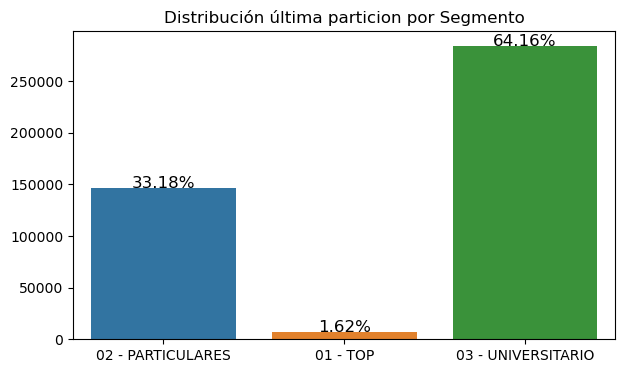

In [29]:
# Analizamos los segmentos para ver como se distribuyern

# Calcular el total de observaciones
total_observaciones = len(df_total_anal_ult)

# Crear el gráfico de barras
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='segment', data=df_total_anal_ult)

# Etiquetar las barras con porcentajes más grandes
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            f'{height / total_observaciones:.2%}', ha="center", fontsize=12)  # Ajustar el tamaño de fuente aquí



# Personalizar el gráfico

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Distribución última particion por Segmento')

plt.show()


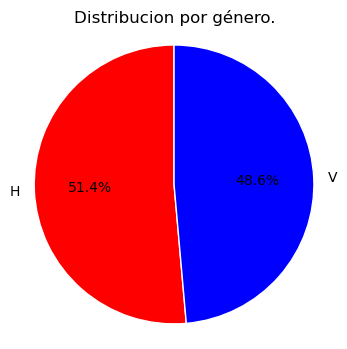

In [30]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'df' con una columna 'variable' que contiene 'h' y 'v'.
# Aquí hay un ejemplo de cómo crear un gráfico de rosca para visualizar la proporción.

# Contar la frecuencia de 'h' y 'v' en la columna 'variable'
conteo = df_total_anal_ult['gender'].value_counts()

# Etiquetas y valores para el gráfico de rosca
etiquetas = conteo.index
valores = conteo.values

# Colores para cada categoría ('h' y 'v')
colores = ['red', 'blue']

# Crear un gráfico de rosca
plt.figure(figsize=(4, 4))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores, wedgeprops={'edgecolor': 'white'})



# Añadir un título
plt.title('Distribucion por género.')

# Mostrar el gráfico
plt.axis('equal')  # Proporción de aspecto igual para que se vea como un círculo
plt.show()








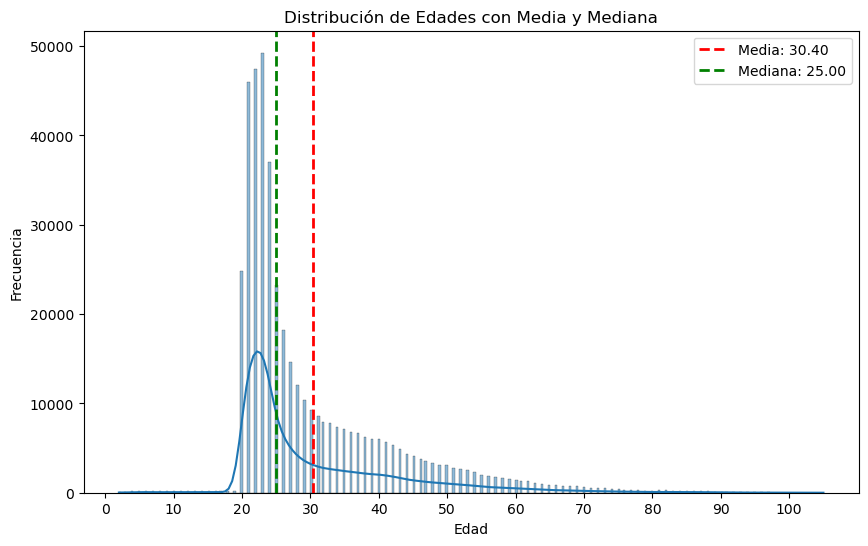

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_total_anal_ult['age'], kde=True)

# Calcular la media y la mediana
media = np.mean(df_total_anal_ult['age'])
mediana = np.median(df_total_anal_ult['age'])

# Dibujar líneas verticales para la media y la mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

plt.title('Distribución de Edades con Media y Mediana')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Establecer etiquetas del eje x en intervalos de 10
plt.xticks(np.arange(0, max(df_total_anal_ult['age']) + 1, 10))

plt.legend()
plt.show()



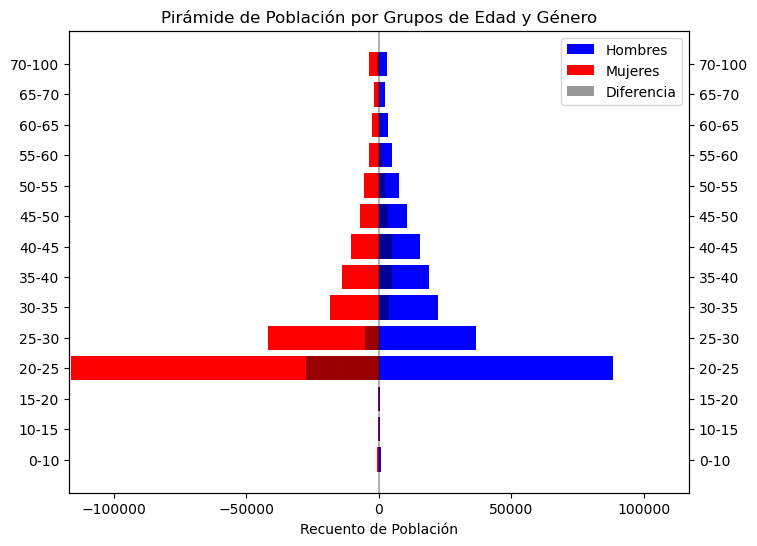

In [32]:
# hacemos una tabla de poblacion (género y edad) para la última partición


# Definir los límites de los grupos de edad
bins = [0, 10, 15,20,25, 30,35, 40, 45, 50, 55, 60, 65, 70, 100]

# Crear grupos de edad y agregarlos al DataFrame
df_total_anal_ult['Grupo de Edad'] = pd.cut(df_total_anal_ult['age'], bins, right=False)

# Calcular el recuento de población en cada grupo de edad para hombres y mujeres
conteo_por_grupo = df_total_anal_ult.groupby(['Grupo de Edad', 'gender']).size().unstack()
conteo_por_grupo['Diferencia'] = conteo_por_grupo['H'] - conteo_por_grupo['V']

# Ordenar los grupos de edad por el rango de edades
conteo_por_grupo = conteo_por_grupo.sort_index()

# Convertir los intervalos en etiquetas legibles
etiquetas_edad = [f'{interval.left}-{interval.right}' for interval in conteo_por_grupo.index]

# Crear la pirámide de población
fig, ax1 = plt.subplots(figsize=(8, 6))

# Graficar las barras para hombres y mujeres
hombres = conteo_por_grupo['V']
mujeres = -conteo_por_grupo['H']

ax1.barh(etiquetas_edad, hombres, color='blue', label='Hombres')
ax1.barh(etiquetas_edad, mujeres, color='red', label='Mujeres')

['#ff9999', '#66b3ff']

# Graficar la diferencia utilizando una línea
ax2 = ax1.twinx()
ax2.barh(etiquetas_edad, conteo_por_grupo['Diferencia']*-1, label='Diferencia', color='black', alpha=0.4)



# Agregar una línea en el punto 0 del eje X
ax1.axvline(0, color='black', linestyle='-', alpha=0.3)
# Personalizar el gráfico
ax1.set_xlabel('Recuento de Población')
ax1.set_title('Pirámide de Población por Grupos de Edad y Género')
# Combina las leyendas de ambas series en una sola leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

# Ajustar los límites de los ejes y hacerlos simétricos

ax1.set_xlim(-117000, 117000)

plt.show()



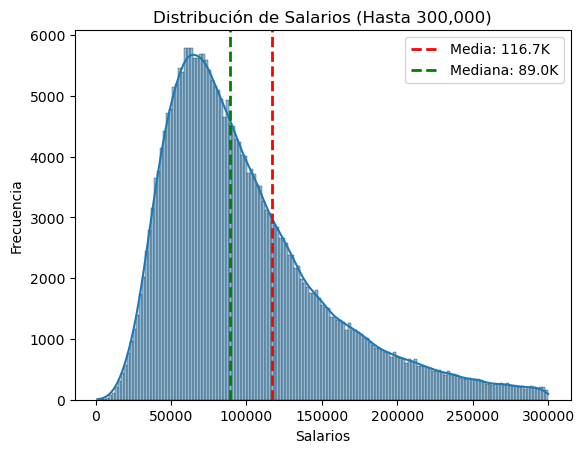

In [33]:
# Define el rango de valores deseados para la visualización
limite_inferior = 0
limite_superior = 300000

# Filtra los datos para la visualización
data_filtrada = df_total_anal_ult[(df_total_anal_ult["salary"] >= limite_inferior) & (df_total_anal_ult["salary"] <= limite_superior)]

# Calcula la media y la mediana en el DataFrame original
media = df_total_anal_ult["salary"].mean()
mediana = df_total_anal_ult["salary"].median()

# Redondea la media y la mediana a millares con un decimal
media_redondeada = round(media / 1000, 1)
mediana_redondeada = round(mediana / 1000, 1)

# Crea un gráfico de distribución
sns.histplot(data=data_filtrada, x='salary', kde=True)

# Dibuja la media y la mediana con los valores redondeados
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_redondeada:.1f}K')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_redondeada:.1f}K')

# Personaliza el gráfico (opcional)
plt.title("Distribución de Salarios (Hasta 300,000)")
plt.xlabel("Salarios")
plt.ylabel("Frecuencia")

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.show()


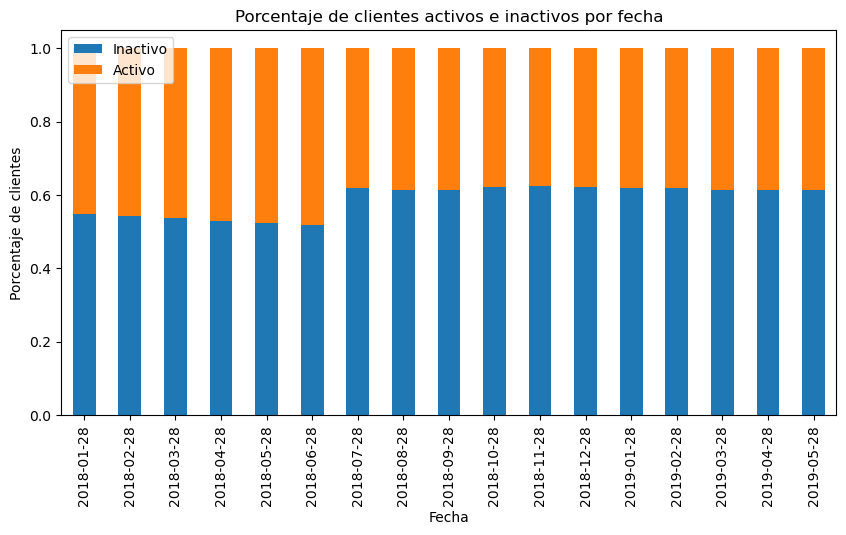

In [34]:
# Crear un DataFrame con los porcentajes de clientes activos e inactivos por fecha
clientes_activos_por_fecha = df_total.groupby(['pk_partition', 'active_customer'])['pk_cid'].nunique().unstack()
clientes_activos_por_fecha = clientes_activos_por_fecha.apply(lambda x: x/x.sum(), axis=1)

# Crear el gráfico de barras apiladas
ax = clientes_activos_por_fecha.plot(kind='bar', stacked=True, figsize=(10,5))

# Añadir etiquetas y leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Porcentaje de clientes')
ax.set_title('Porcentaje de clientes activos e inactivos por fecha')
ax.legend(['Inactivo', 'Activo'], loc='upper left')

### Correlación de variables

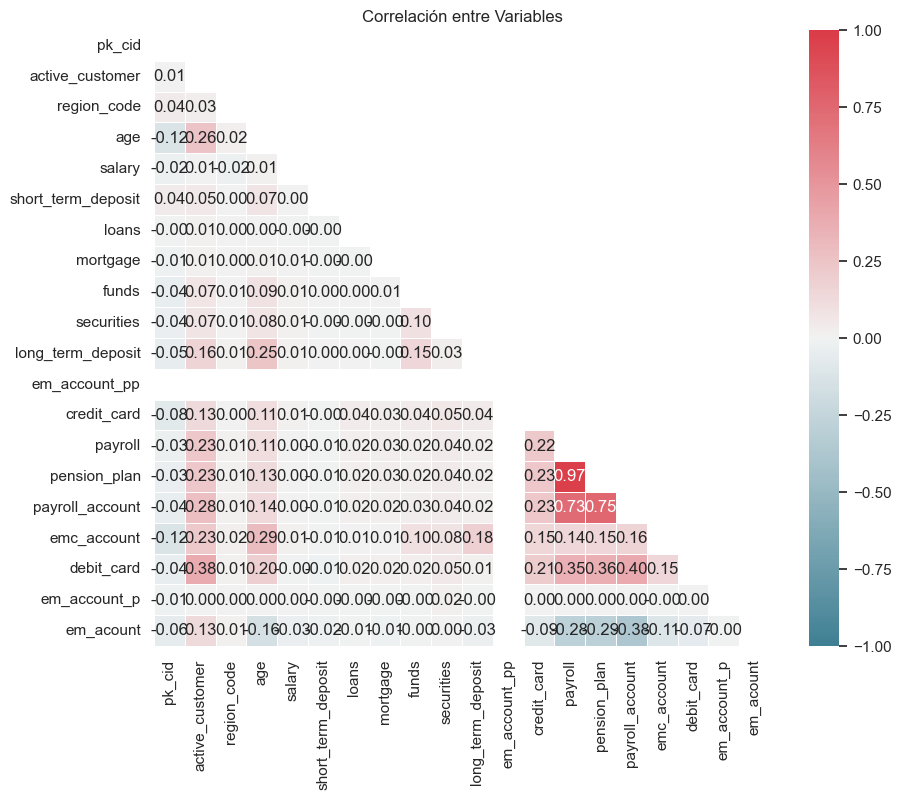

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_total.corr()

# Configuración de estilo para hacerlo más atractivo
sns.set(style="white") 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, square=True, vmin=-1, vmax=1)

plt.title('Correlación entre Variables')
plt.show()


In [36]:
df_total['salary'].describe()

count    4,450,821.00
mean       115,816.72
std        199,551.89
min          1,202.73
25%         61,500.63
50%         88,654.65
75%        131,669.91
max     28,894,395.51
Name: salary, dtype: float64

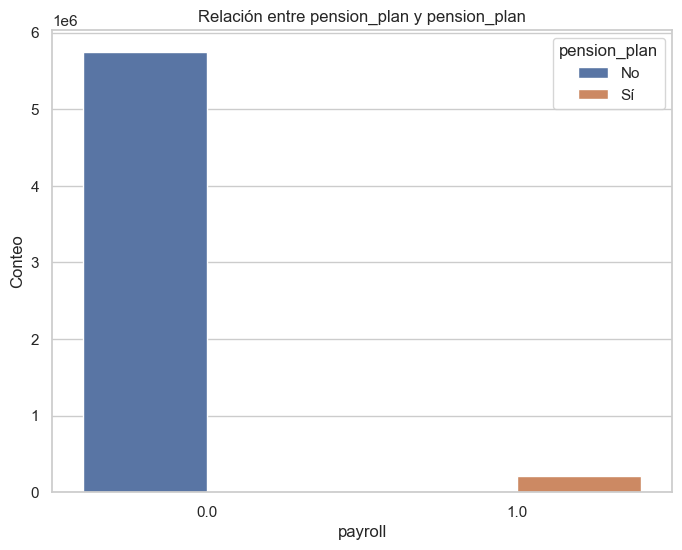

In [37]:
df_total['payroll']
df_total['pension_plan']


# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="payroll", hue="pension_plan")

# Personalización del gráfico
plt.title("Relación entre pension_plan y pension_plan")
plt.xlabel("payroll")
plt.ylabel("Conteo")
plt.legend(title="pension_plan", labels=["No", "Sí"])
plt.show()


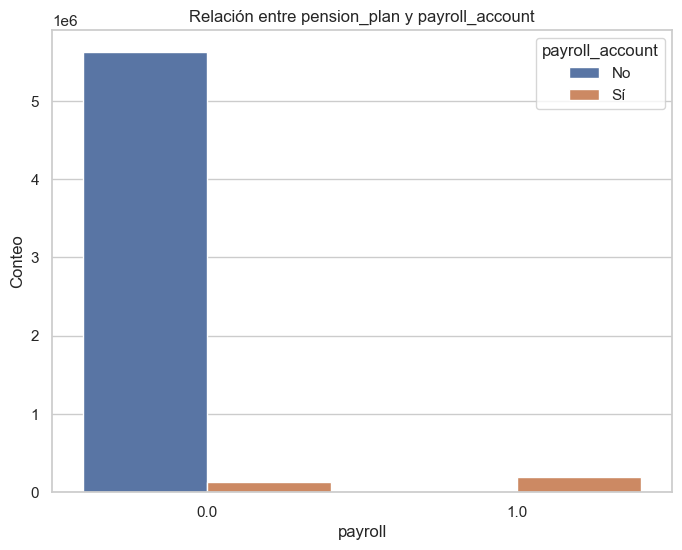

In [38]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="payroll", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre pension_plan y payroll_account")
plt.xlabel("payroll")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()


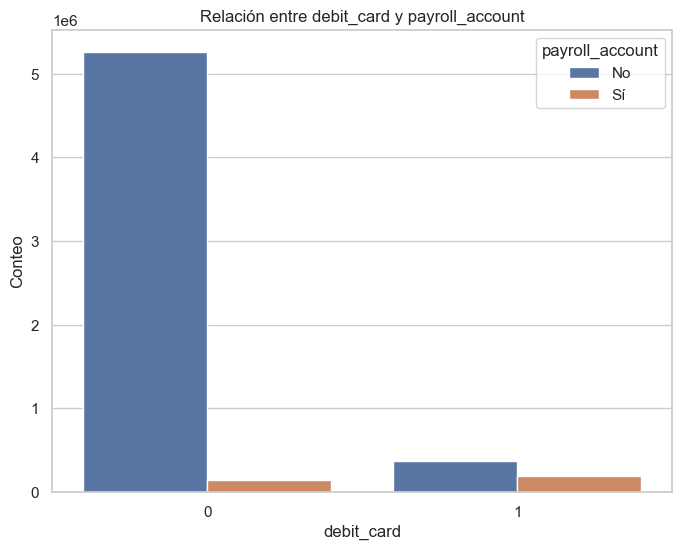

In [39]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="debit_card", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre debit_card y payroll_account")
plt.xlabel("debit_card")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()

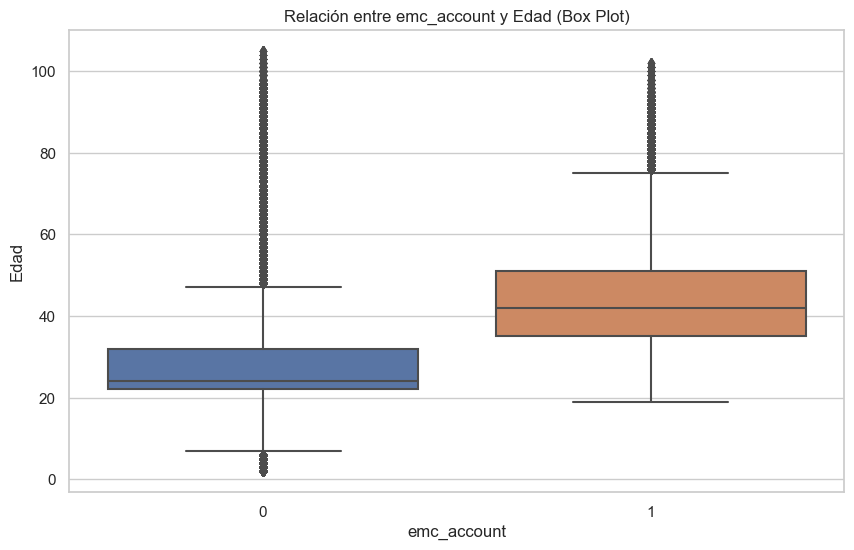

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de cajas (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='emc_account', y='age', data=df_total)

# Personalizar el gráfico
plt.title('Relación entre emc_account y Edad (Box Plot)')
plt.xlabel('emc_account')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()


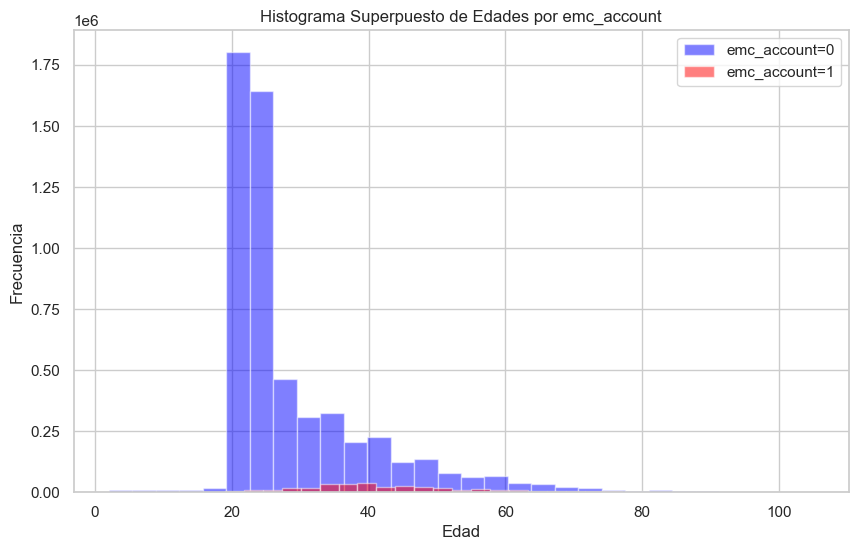

In [41]:
import matplotlib.pyplot as plt

# Filtrar los datos según el valor de la variable binaria
binaria_0 = df_total[df_total['emc_account'] == 0]['age']
binaria_1 = df_total[df_total['emc_account'] == 1]['age']

# Crear un histograma superpuesto
plt.figure(figsize=(10, 6))
plt.hist(binaria_0, bins=30, alpha=0.5, color='blue', label='emc_account=0')
plt.hist(binaria_1, bins=30, alpha=0.5, color='red', label='emc_account=1')

# Personalizar el gráfico
plt.title('Histograma Superpuesto de Edades por emc_account')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el gráfico
plt.show()


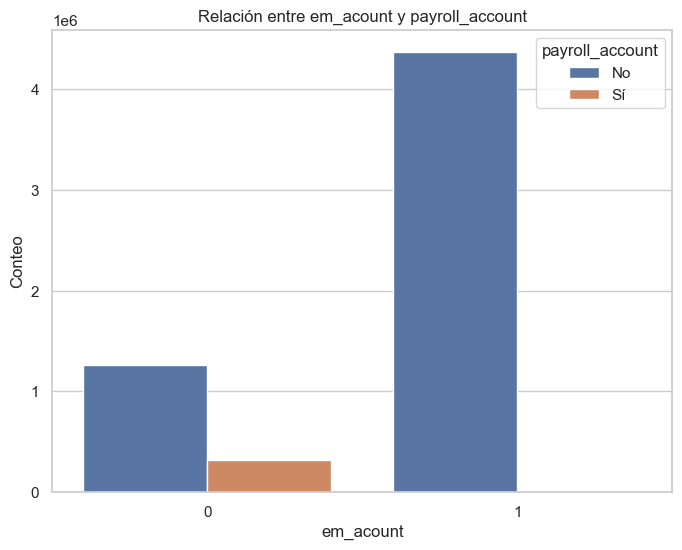

In [42]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="em_acount", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre em_acount y payroll_account")
plt.xlabel("em_acount")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()

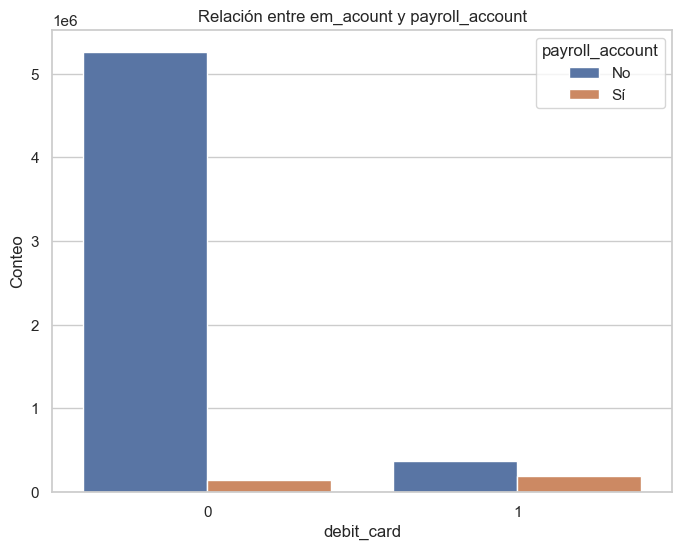

In [43]:
# Gráfico de barras apiladas
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_total, x="debit_card", hue="payroll_account")

# Personalización del gráfico
plt.title("Relación entre em_acount y payroll_account")
plt.xlabel("debit_card")
plt.ylabel("Conteo")
plt.legend(title="payroll_account", labels=["No", "Sí"])
plt.show()

In [44]:
df_total.dtypes

pk_cid                  int64
pk_partition           object
entry_date             object
entry_channel          object
active_customer       float64
segment                object
country_id             object
region_code           float64
gender                 object
age                     int64
deceased               object
salary                float64
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
dtype: object

## Data Cleaning

### Imputación de valores nulos

In [45]:
df_total.isna().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
dtype: int64

#### entry_channel

In [46]:
# Completamos los valores faltantes de la variable entry_chanel por usuario con el metodo ffill y posteriormente con el metodo bfill
df_total['entry_channel'] = df_total.groupby('pk_cid')['entry_channel'].transform(lambda x: x.ffill().bfill())
df_total["entry_channel"].isna().sum()

9335

In [47]:
# Agrupamos en OTROS los que tienen pocos valores y los NAN restantes. Seleccionando los primeros 11, nos quedamos con el 99% de las observaciones.
print(sum(df_total["entry_channel"].value_counts(normalize=True).head(11)))
canales_99 = list(pd.DataFrame(df_total["entry_channel"].value_counts(normalize=True).head(11)).index)
df_total.loc[~df_total["entry_channel"].isin(canales_99), "entry_channel"] = "OTROS"
print(df_total["entry_channel"].isna().sum())

0.9919942407848441
0


#### segment

In [48]:
# Completar los valores faltantes de la variable por usuario con el metodo ffill y posteriormente con el metodo bfill
df_total['segment'] = df_total.groupby('pk_cid')['segment'].transform(lambda x: x.ffill().bfill())
df_total["segment"].isna().sum()

9068

In [49]:
#reemplazar valores nulos restantes por categoría "not defined" 
df_total.loc[df_total["segment"].isna(), "segment"] = "not defined"

In [50]:
df_total.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'segment', 'country_id', 'region_code', 'gender',
       'age', 'deceased', 'salary', 'short_term_deposit', 'loans', 'mortgage',
       'funds', 'securities', 'long_term_deposit', 'em_account_pp',
       'credit_card', 'payroll', 'pension_plan', 'payroll_account',
       'emc_account', 'debit_card', 'em_account_p', 'em_acount'],
      dtype='object')

#### region_code

In [51]:
df_total["region_code"].isna().sum()

2264

In [52]:
# Completar los valores faltantes de la variable por usuario con el metodo ffill y posteriormente con el metodo bfill
df_total['region_code'] = df_total.groupby('pk_cid')['region_code'].transform(lambda x: x.ffill().bfill())
df_total["region_code"].isna().sum()

2138

In [53]:
# Aquellos que tienen nan en region_code son españoles
df_total[df_total['country_id'] == 'ES']['region_code'].isna().sum()

0

In [54]:
# vemos que hay no Españoles con region_code
print(df_total[df_total['country_id'] != 'ES']['region_code'].value_counts(dropna=False))
print('Total de observaciones: '+str(len(df_total[df_total['country_id'] != 'ES'])))

NaN      2138
28.00      35
41.00      32
8.00       10
33.00      10
3.00        5
15.00       4
7.00        4
43.00       4
1.00        3
31.00       3
27.00       2
5.00        2
Name: region_code, dtype: int64
Total de observaciones: 2252


In [55]:
# el region code solo debe de aplicar a ES. Ponemos todos los region_code que no sean de ES a un nuevo valor, por ejemplo 55
df_total.loc[df_total["country_id"]!='ES', 'region_code']=55

#### country_id

#### gender

In [56]:
#son sólo dos clientes los que no tienen registro, los eliminamos
df_total.loc[df_total["gender"].isna()]["pk_cid"].unique()

array([216507, 476023], dtype=int64)

In [57]:
condicion = df_total[df_total["gender"].isnull()].index
df_total.drop(index = condicion, inplace=True)

#### salary

In [58]:
#teniendo un 30% de nan y para no eliminar la variable ni perder el 30% de los datos, vamos a hacer Binning y crear una categoria para los nan
print(df_total['salary'].isna().sum())

1512103


Vamos a hacer un nuevo DF para poder optar por otras alternativas mas adelante

In [59]:
df_total_salary_binning = df_total.copy() # Crfeamos un nuevo DF

# Hacemos el binning
df_total_salary_binning['salary'] = pd.cut(df_total_salary_binning['salary'], bins=[0, 20000, 40000, 60000, 80000, 100000, 150000, 250000, float('inf')], labels=['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-150K', '150K-250K','250K +'], right=False)
df_total_salary_binning['salary'].cat.add_categories('Salario no informado', inplace=True)
df_total_salary_binning['salary'].fillna('Salario no informado', inplace=True)


C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\18374945.py:5: FutureWarning:

The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.



#### payroll y pension_plan

In [60]:
# miramos si son los mismos los que tienen nulos en pension plan y rollout
df_total_salary_binning[df_total_salary_binning['pension_plan'].isna()]['pension_plan'].index  ==  df_total_salary_binning[df_total_salary_binning['payroll'].isna()]['payroll'].index 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [61]:
#eliminamos esos registros
df_total_salary_binning = df_total_salary_binning.loc[df_total_salary_binning['pension_plan'].notna()]

In [62]:
# comprobamos que ya no quedan valores nulos el df
df_total_salary_binning.isna().any()

pk_cid                False
pk_partition          False
entry_date            False
entry_channel         False
active_customer       False
segment               False
country_id            False
region_code           False
gender                False
age                   False
deceased              False
salary                False
short_term_deposit    False
loans                 False
mortgage              False
funds                 False
securities            False
long_term_deposit     False
em_account_pp         False
credit_card           False
payroll               False
pension_plan          False
payroll_account       False
emc_account           False
debit_card            False
em_account_p          False
em_acount             False
dtype: bool

In [63]:
df_total_salary_binning.shape

(5962838, 27)

### Ajuste de tipos

In [64]:
df_total_salary_binning.dtypes

pk_cid                   int64
pk_partition            object
entry_date              object
entry_channel           object
active_customer        float64
segment                 object
country_id              object
region_code            float64
gender                  object
age                      int64
deceased                object
salary                category
short_term_deposit       int64
loans                    int64
mortgage                 int64
funds                    int64
securities               int64
long_term_deposit        int64
em_account_pp            int64
credit_card              int64
payroll                float64
pension_plan           float64
payroll_account          int64
emc_account              int64
debit_card               int64
em_account_p             int64
em_acount                int64
dtype: object

#### pk_partition

In [65]:
#pasar a formato fecha
df_total_salary_binning['pk_partition'] = pd.to_datetime(df_total_salary_binning['pk_partition'])

#### entry_date

In [66]:
#cambiar estas dos fechas para que no tire error
df_total_salary_binning.loc[df_total_salary_binning["entry_date"]=="2015-02-29", "entry_date"] = "2015-02-28"
df_total_salary_binning.loc[df_total_salary_binning["entry_date"]=="2019-02-29", "entry_date"] = "2019-02-28"

In [67]:
#pasar a formato fecha
df_total_salary_binning['entry_date'] = pd.to_datetime(df_total_salary_binning['entry_date'])

#### Productos a booleano

In [68]:
df_total_salary_binning.columns[12:]

Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount'],
      dtype='object')

In [69]:
df_total_salary_binning[df_total_salary_binning.columns[12:]] = df_total_salary_binning[df_total_salary_binning.columns[12:]].astype(bool)

In [70]:
df_total_salary_binning.dtypes

pk_cid                         int64
pk_partition          datetime64[ns]
entry_date            datetime64[ns]
entry_channel                 object
active_customer              float64
segment                       object
country_id                    object
region_code                  float64
gender                        object
age                            int64
deceased                      object
salary                      category
short_term_deposit              bool
loans                           bool
mortgage                        bool
funds                           bool
securities                      bool
long_term_deposit               bool
em_account_pp                   bool
credit_card                     bool
payroll                         bool
pension_plan                    bool
payroll_account                 bool
emc_account                     bool
debit_card                      bool
em_account_p                    bool
em_acount                       bool
d

## Feature engineering

In [71]:
df_total_salary_binning.shape

(5962838, 27)

In [73]:
df_total_salary_binning.to_csv('df_total_salary_binning.csv')

### Dataset Entrenamiento -- df_modelado

In [72]:
df_total_salary_binning_train = df_total_salary_binning[df_total_salary_binning['pk_partition'] != '2019-05-28']

In [74]:
df_total_salary_binning_train.shape

(5519845, 27)

#### entry_date


In [75]:
#variable antiguedad
ult_fecha = pd.to_datetime(datetime(2019, 4, 30))
df_total_salary_binning_train["antiguedad"] = (ult_fecha - pd.to_datetime(df_total_salary_binning_train["entry_date"]))  



C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\2323353968.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
df_total_salary_binning_train["antiguedad"] = df_total_salary_binning_train["antiguedad"].dt.days

C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\2816652094.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### meses de cada producto en total

In [77]:
lista_prod = df_total_salary_binning_train.columns[12:-1]

In [78]:
lista_prod

Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'debit_card',
       'em_account_p', 'em_acount'],
      dtype='object')

In [79]:
#cuantos meses cada cliente ha tenido cada producto en total (no consecutivos)
clientes_prod= pd.DataFrame(df_total_salary_binning_train.groupby(by="pk_cid")[lista_prod].sum()).reset_index()


#### cliente activo ultimo mes

In [76]:
df_total_salary_binning_train['pk_partition'].value_counts()

2019-04-28    439625
2019-03-28    436181
2019-02-28    431725
2019-01-28    426873
2018-12-28    422479
2018-11-28    416385
2018-10-28    402298
2018-09-28    375321
2018-08-28    352920
2018-07-28    339338
2018-06-28    252103
2018-05-28    249915
2018-04-28    247452
2018-03-28    245247
2018-02-28    242507
2018-01-28    239476
Name: pk_partition, dtype: int64

In [84]:
#cliente activo en el ultimo mes o no
clientes_activos_ultmes= list(df_total_salary_binning_train[df_total_salary_binning_train["pk_partition"].astype(str) == "2019-04-28"]["pk_cid"].unique())
clientes_prod["cliente_activo"] = clientes_prod["pk_cid"].isin(clientes_activos_ultmes)


In [85]:
clientes_prod["cliente_activo"] = clientes_prod["pk_cid"].isin(clientes_activos_ultmes)

In [86]:
df_total_salary_binning_train['total_productos'] = df_total_salary_binning_train[lista_prod].sum(axis=1)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\614854017.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### pivot table con nuevas variables

In [87]:
#pivot table con nuevas variables
pivoted = pd.DataFrame(df_total_salary_binning_train.pivot(index="pk_cid", columns="pk_partition", values="total_productos").fillna(0))
pivoted_convar= pivoted.copy()
pivoted_convar["max_cuentas"] = pivoted.max(axis=1) #maximo de productos que ha tenido
pivoted_convar["min_cuentas"] = pivoted.min(axis=1) #minimo de productos que ha tenido
pivoted_convar["promedio_cuentas"] = pivoted.iloc[:,0:17].mean(axis=1) # promedio de productos que tiene en el tiempo
pivoted_convar["total_cuentas"] = pivoted.iloc[:,0:17].sum(axis=1) #suma del total de las cuentas de todos los meses, si es 0, el cliente nunca ha tenido un producto
pivoted_convar

pk_partition,2018-01-28 00:00:00,2018-02-28 00:00:00,2018-03-28 00:00:00,2018-04-28 00:00:00,2018-05-28 00:00:00,2018-06-28 00:00:00,2018-07-28 00:00:00,2018-08-28 00:00:00,2018-09-28 00:00:00,2018-10-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-02-28 00:00:00,2019-03-28 00:00:00,2019-04-28 00:00:00,max_cuentas,min_cuentas,promedio_cuentas,total_cuentas
pk_cid,,,,,,,,,,,,,,,,,,,,
15891,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.06,1.00
16063,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
16203,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.25,4.00
16502,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,0.00,0.69,11.00
17457,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,1.00,3.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.19,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548202,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1548203,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1548204,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [88]:
prueba = pivoted_convar.copy()
prueba2 = prueba.drop(prueba.iloc[:, 0:16],axis = 1)

In [81]:
prueba2.shape

(451840, 4)

In [91]:
merge2 = clientes_prod.merge(prueba2, how="left", on="pk_cid")

In [92]:
merge2.shape

(451840, 21)

#### tabla diferencia con nuevas variables

In [93]:
#tabla de diferencia con nuevas variables
pivoted_diff = pd.DataFrame(pivoted.diff(axis=1))
pivoted_diff["cambios"] = pivoted_diff.abs().sum(axis=1).fillna(0) # total de cambios en cuentas (altas más bajas )
pivoted_diff["num_bajas"]= np.count_nonzero(pivoted_diff.values<0,axis=1) #cuantas veces dio de baja a uno o más productos

In [94]:
pivoted_diff.shape

(451840, 18)

In [95]:
# numero de veces que ha dado de alta a uno o más productos
pivoted_diff["num_altas"]=np.count_nonzero(pivoted_diff.drop(["cambios", "num_bajas"], axis=1).values>0, axis=1)

In [102]:
prueba3.shape

(451840, 3)

In [98]:
prueba3 = pivoted_diff.drop(prueba.iloc[:, 0:16],axis = 1)
merge3 = merge2.merge(prueba3, how="left", on="pk_cid")

In [99]:
merge3.shape

(451840, 24)

##### ultima imagen de cada usuario + total productos en la ultima imagen

In [104]:
# nos quedamos los la ultima observacion para cada usuario
ultima_huella = df_total_salary_binning_train.groupby('pk_cid').last()

In [130]:
ultima_huella.shape

(451840, 28)

In [131]:
# nos quedamos solo con el DF de los productos
ultima_huella_prod = ultima_huella[lista_prod]

In [133]:
# sumamos el total de productos por usuario
ultima_huella_prod['TOTAL_ultima_imagen'] = ultima_huella_prod[lista_prod].sum(axis=1)
prod_totalfinal = pd.DataFrame(ultima_huella_prod['TOTAL_ultima_imagen'])

C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\2908810721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
merge4 = merge3.merge(prod_totalfinal, how="left", on="pk_cid")

In [165]:
merge4.shape

(451840, 25)

#### agrupacion por tipo de producto

In [166]:
# total meses por tipo de producto
merge4['prod_ahorro_inversion'] = merge4[['short_term_deposit','funds','securities','long_term_deposit','pension_plan']].sum(axis=1)
merge4['prod_financiacion'] = merge4[['loans','mortgage','credit_card']].sum(axis=1)
merge4['servicios'] = merge4[['em_account_pp','payroll_account','payroll','emc_account','em_account_p','em_acount','debit_card']].sum(axis=1)

In [167]:
# de cuentas que tiene o ha tenido por grupo
merge4["num_ahorro_inversion"]=np.count_nonzero((merge4[['short_term_deposit','funds','securities','long_term_deposit','pension_plan']]).values>0, axis=1)
merge4["num_financiacion"]=np.count_nonzero((merge4[['loans','mortgage','payroll','debit_card','credit_card']]).values>0, axis=1)
merge4["num_servicios"]=np.count_nonzero((merge4[['em_account_pp','payroll_account','emc_account','em_account_p','em_acount']]).values>0, axis=1)

#### Tabla socio_com ultima imagen

In [168]:
df_socio_com = df_total_salary_binning_train.drop(columns=lista_prod)

In [169]:
#crear una nueva tabla, una fila por cliente con los datos de la utlima partición
df_sociocom_unico = df_socio_com.groupby("pk_cid").last().reset_index()


In [170]:
df_sociocom_unico.shape

(451840, 14)

In [171]:
merge4.shape

(451840, 31)

In [172]:
df_modelado = merge4.merge(df_sociocom_unico, on='pk_cid',how='left')

In [173]:
df_modelado.shape

(451840, 44)

In [174]:
df_modelado.head().T

,0,1,2,3,4
pk_cid,15891,16063,16203,16502,17457
short_term_deposit,0,0,0,0,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0
securities,0,0,0,0,0
long_term_deposit,0,0,0,0,15
em_account_pp,0,0,0,0,0
credit_card,0,0,0,0,0
payroll,0,0,0,0,0


Vamos a ver como de balanceados estan los target

In [175]:
df_y = df_prod[df_prod['pk_partition']=='2019-05-28']

In [176]:
df_y.drop('pk_partition',axis=1, inplace=True)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\491334154.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
variable = []
observaciones = []
observaciones_p = []
for prod in lista_prod:
    variable.append(prod)
    observaciones.append(df_y[prod].value_counts().get(1, 0))
    observaciones_p.append(round(df_y[prod].value_counts(normalize=True).get(1, 0) * 100, 1))

# Creamos el DF
data = {'Variable':variable, 'Observaciones' : observaciones, '%': observaciones_p}
df_balanceo = pd.DataFrame(data)
df_balanceo

,Variable,Observaciones,%
0,short_term_deposit,2,0.00
1,loans,30,0.00
2,mortgage,23,0.00
3,funds,1315,0.30
4,securities,1789,0.40
5,long_term_deposit,6129,1.40
6,em_account_pp,0,0.00
7,credit_card,4801,1.10
8,payroll,16333,3.70
9,pension_plan,17353,3.90


Vamos a eliminar 5 productos por tener nulas o muy pocas observaciones:
- short_term_deposit
- em_account_p
- em_account_pp
- loans
- mortgage

In [178]:
# nos quedamos con los porductos que tienen mas de 0.0% de observaciones
productos_finales = list(df_balanceo[df_balanceo['%'] >=0.001]['Variable'])

In [179]:
df_y = df_y.set_index('pk_cid')[productos_finales]

In [180]:
# creamos listas para cambiar el nombre
original = []
nueva = []
for x in df_y.columns:
    original.append(x)
    nueva.append(f'y_{x}')

#creamos un diccionario
cambio_nom = dict(zip(original, nueva))

# cambiamos el nombre
df_y = df_y.rename(columns=cambio_nom)

In [181]:
df_y.shape

(442995, 10)

CREAMOS ANTEULTIMA

In [182]:
# seleccionamos la anteultima particion para eliminar en el modelo aquellos usuarios que ya tenian el producto en la anteultima particion ya que es mas probable que tengan el producto y tenemos que encontrar nuievos clientes para los productos
Y_ANTE = df_prod[df_prod['pk_partition']=='2019-04-28']
Y_ANTE.drop('pk_partition', axis=1, inplace=True)

C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\1744874056.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Vamos a crear variables por productos de la anteultima particion para poder filtrar una vez obtenidos los resultados. Los que lo tenian en esa particion es muy probable que lo tengan en la ultima y no queremos usarlo para entrenar el modelo

In [183]:
df_Y_total_ANTE = Y_ANTE.set_index('pk_cid')[productos_finales]

In [184]:
# creamos listas para cambiar el nombre
original = []
nueva = []
for x in df_Y_total_ANTE.columns:
    original.append(x)
    nueva.append(f'{x}_ANTE')

#creamos un diccionario
cambio_nom = dict(zip(original, nueva))

# cambiamos el nombre
df_Y_total_ANTE = df_Y_total_ANTE.rename(columns=cambio_nom)

In [185]:
df_modelado = df_modelado.merge(df_Y_total_ANTE.reset_index(), on='pk_cid')

### Dataset Prediciones -- df_prediciones

In [200]:
df_total_salary_binning_pred = df_total_salary_binning.copy()

#### entry_date

In [201]:
#variable antiguedad
ult_fecha = pd.to_datetime(datetime(2019, 5, 31))
df_total_salary_binning_pred["antiguedad"] = (ult_fecha - pd.to_datetime(df_total_salary_binning_pred["entry_date"]))  
df_total_salary_binning_pred["antiguedad"] = df_total_salary_binning_pred["antiguedad"].dt.days

#### meses de cada producto en total

In [203]:
#cuantos meses cada cliente ha tenido cada producto en total (no consecutivos)
clientes_prod= pd.DataFrame(df_total_salary_binning_pred.groupby(by="pk_cid")[lista_prod].sum()).reset_index()


#### cliente activo ultimo mes

In [204]:
#cliente activo en el ultimo mes o no
clientes_activos_ultmes= list(df_total_salary_binning_pred[df_total_salary_binning_pred["pk_partition"].astype(str) == "2019-05-28"]["pk_cid"].unique())
clientes_prod["cliente_activo"] = clientes_prod["pk_cid"].isin(clientes_activos_ultmes)

In [205]:
df_total_salary_binning_pred['total_productos'] = df_total_salary_binning_pred[lista_prod].sum(axis=1)

#### pivot table con nuevas variables

In [206]:
#pivot table con nuevas variables
pivoted = pd.DataFrame(df_total_salary_binning_pred.pivot(index="pk_cid", columns="pk_partition", values="total_productos").fillna(0))
pivoted_convar= pivoted.copy()
pivoted_convar["max_cuentas"] = pivoted.max(axis=1) #maximo de productos que ha tenido
pivoted_convar["min_cuentas"] = pivoted.min(axis=1) #minimo de productos que ha tenido
pivoted_convar["promedio_cuentas"] = pivoted.iloc[:,0:17].mean(axis=1) # promedio de productos que tiene en el tiempo
pivoted_convar["total_cuentas"] = pivoted.iloc[:,0:17].sum(axis=1) #suma del total de las cuentas de todos los meses, si es 0, el cliente nunca ha tenido un producto



In [207]:
prueba = pivoted_convar.copy()
prueba2 = prueba.drop(prueba.iloc[:, 0:17],axis = 1)

In [208]:
merge2 = clientes_prod.merge(prueba2, how="left", on="pk_cid")

#### tabla diferencia con nuevas variables

In [209]:
#tabla de diferencia con nuevas variables
pivoted_diff = pd.DataFrame(pivoted.diff(axis=1))
pivoted_diff["cambios"] = pivoted_diff.abs().sum(axis=1).fillna(0) # total de cambios en cuentas (altas más bajas )
pivoted_diff["num_bajas"]= np.count_nonzero(pivoted_diff.values<0,axis=1) #cuantas veces dio de baja a uno o más productos


In [210]:
# numero de veces que ha dado de alta a uno o más productos
pivoted_diff["num_altas"]=np.count_nonzero(pivoted_diff.drop(["cambios", "num_bajas"], axis=1).values>0, axis=1)


In [211]:
prueba

pk_partition,2018-01-28 00:00:00,2018-02-28 00:00:00,2018-03-28 00:00:00,2018-04-28 00:00:00,2018-05-28 00:00:00,2018-06-28 00:00:00,2018-07-28 00:00:00,2018-08-28 00:00:00,2018-09-28 00:00:00,2018-10-28 00:00:00,2018-11-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-02-28 00:00:00,2019-03-28 00:00:00,2019-04-28 00:00:00,2019-05-28 00:00:00,max_cuentas,min_cuentas,promedio_cuentas,total_cuentas
pk_cid,,,,,,,,,,,,,,,,,,,,,
15891,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.06,1.00
16063,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
16203,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.29,5.00
16502,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,0.00,0.76,13.00
17457,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,1.00,3.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,1.00,2.24,38.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553685,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1553686,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1553687,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [212]:
prueba3 = pivoted_diff.drop(prueba.iloc[:, 0:17],axis = 1)
merge3 = merge2.merge(prueba3, how="left", on="pk_cid")

##### ultima imagen de cada usuario + total productos en la ultima imagen

In [213]:
# nos quedamos los la ultima observacion para cada usuario
ultima_huella = df_total_salary_binning_pred.groupby('pk_cid').last()

In [214]:
# nos quedamos solo con el DF de los productos
ultima_huella_prod = ultima_huella[lista_prod]

In [215]:
# sumamos el total de productos por usuario
ultima_huella_prod['TOTAL_ultima_imagen'] = ultima_huella_prod[lista_prod].sum(axis=1)
prod_totalfinal = pd.DataFrame(ultima_huella_prod['TOTAL_ultima_imagen'])

C:\Users\Mikel\AppData\Local\Temp\ipykernel_16708\2908810721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [216]:
merge4 = merge3.merge(prod_totalfinal, how="left", on="pk_cid")

#### agrupacion por tipo de producto

In [217]:
# total meses por tipo de producto
merge4['prod_ahorro_inversion'] = merge4[['short_term_deposit','funds','securities','long_term_deposit','pension_plan']].sum(axis=1)
merge4['prod_financiacion'] = merge4[['loans','mortgage','credit_card']].sum(axis=1)
merge4['servicios'] = merge4[['em_account_pp','payroll_account','payroll','emc_account','em_account_p','em_acount','debit_card']].sum(axis=1)

In [218]:
# de cuentas que tiene o ha tenido por grupo
merge4["num_ahorro_inversion"]=np.count_nonzero((merge4[['short_term_deposit','funds','securities','long_term_deposit','pension_plan']]).values>0, axis=1)
merge4["num_financiacion"]=np.count_nonzero((merge4[['loans','mortgage','payroll','debit_card','credit_card']]).values>0, axis=1)
merge4["num_servicios"]=np.count_nonzero((merge4[['em_account_pp','payroll_account','emc_account','em_account_p','em_acount']]).values>0, axis=1)

#### Tabla socio_com ultima imagen

In [219]:
df_socio_com = df_total_salary_binning_pred.drop(columns=lista_prod)

In [220]:
#crear una nueva tabla, una fila por cliente con los datos de la utlima partición
df_sociocom_unico = df_socio_com.groupby("pk_cid").last().reset_index()

In [221]:
df_prediciones = merge4.merge(df_sociocom_unico, on='pk_cid',how='left')

Añadimos la última imagen para cada producto. Lo llamaremos Ante_producto a cada una para que coincida con el nombre en df_entrenamiento

In [222]:
df_pred_ANTE = df_y.copy()

In [223]:
for x in df_pred_ANTE.columns:
    df_pred_ANTE.rename(columns={x:f'{x}_ANTE'},inplace=True)

In [224]:
# cambiamos el nombre de 'y_producto_ANTE' a 'productos_ANTE'productos_finales
quitar_y = [valor[2:] for valor in df_pred_ANTE.columns]
cambio_nombre = dict(zip(list(df_pred_ANTE.columns), quitar_y))

In [225]:
df_pred_ANTE = df_pred_ANTE.rename(columns=cambio_nombre)

In [226]:
df_pred_ANTE

,funds_ANTE,securities_ANTE,long_term_deposit_ANTE,credit_card_ANTE,payroll_ANTE,pension_plan_ANTE,payroll_account_ANTE,emc_account_ANTE,debit_card_ANTE,em_acount_ANTE
pk_cid,,,,,,,,,,
16063,0,0,0,0,0.00,0.00,0,0,0,0
16203,0,0,0,0,0.00,0.00,0,0,0,1
16502,0,0,0,0,0.00,0.00,0,1,0,1
17457,0,0,1,0,0.00,0.00,0,0,1,1
17590,0,0,0,0,0.00,0.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1553685,0,0,0,0,0.00,0.00,0,0,0,0
1553686,0,0,0,0,0.00,0.00,0,0,0,0
1553687,0,0,0,0,0.00,0.00,0,0,0,0


In [227]:
df_prediciones.shape

(456371, 44)

In [228]:
df_prediciones = df_prediciones.merge(df_pred_ANTE, on='pk_cid')

In [229]:
df_prediciones.columns

Index(['pk_cid', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'cliente_activo',
       'max_cuentas', 'min_cuentas', 'promedio_cuentas', 'total_cuentas',
       'cambios', 'num_bajas', 'num_altas', 'TOTAL_ultima_imagen',
       'prod_ahorro_inversion', 'prod_financiacion', 'servicios',
       'num_ahorro_inversion', 'num_financiacion', 'num_servicios',
       'pk_partition', 'entry_date', 'entry_channel', 'active_customer',
       'segment', 'country_id', 'region_code', 'gender', 'age', 'deceased',
       'salary', 'antiguedad', 'total_productos', 'funds_ANTE',
       'securities_ANTE', 'long_term_deposit_ANTE', 'credit_card_ANTE',
       'payroll_ANTE', 'pension_plan_ANTE', 'payroll_account_ANTE',
       'emc_account_ANTE', 'debit_card_ANTE', 'em_acount_ANTE'],
      dtype='object')

## Data Encoding

### Dataset Entrenamiento -- df_modelado

In [186]:
df_modelado.pk_partition.value_counts()

2019-04-28    439625
Name: pk_partition, dtype: int64

In [187]:
# y con los vivos ;-)
df_modelado = df_modelado[df_modelado['deceased']=='N']

In [188]:
df_modelado.shape

(439541, 54)

In [189]:
df_modelado.drop(['country_id','entry_date','region_code','pk_partition','deceased'],axis=1, inplace=True)

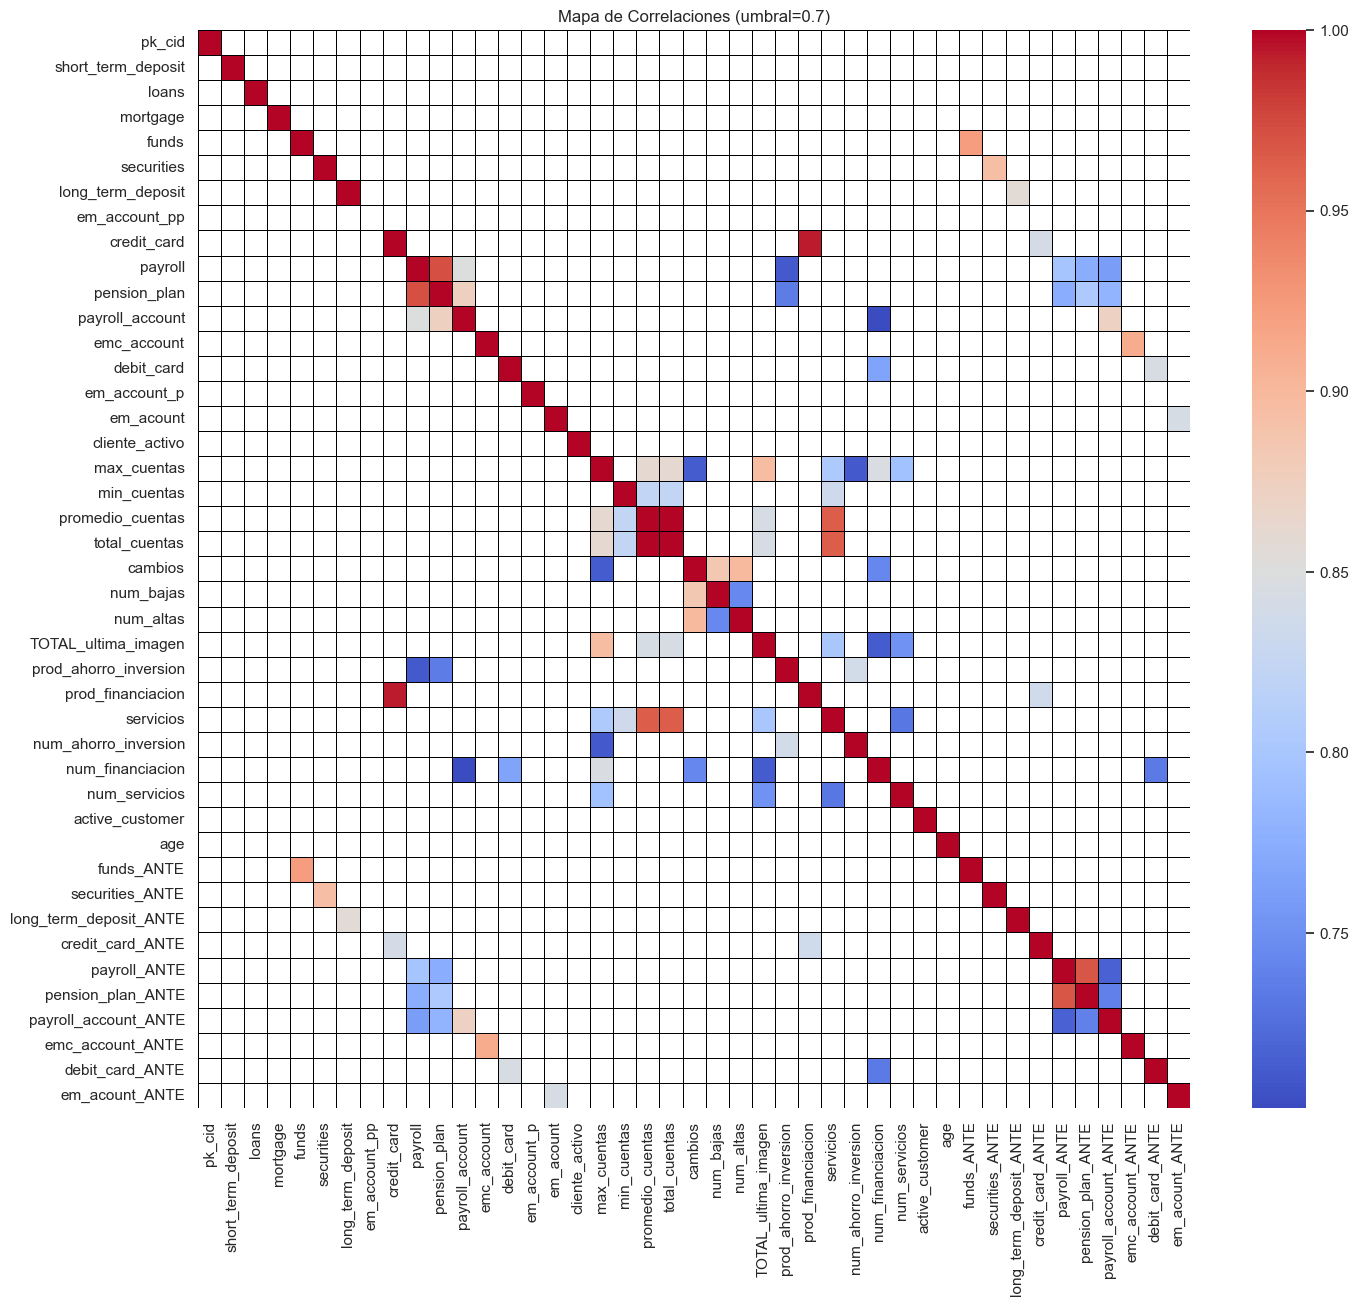

In [208]:
# Calcular matriz de correlación
correlation_matrix = df_modelado.corr()

# Establecer un umbral para las correlaciones
umbral_correlacion = 0.7  # Puedes ajustar este valor según tus necesidades

# Filtrar solo las correlaciones que superan el umbral
correlaciones_fuertes = correlation_matrix[abs(correlation_matrix) > umbral_correlacion]

# Crear mapa de calor
plt.figure(figsize=(16, 14))
sns.heatmap(correlaciones_fuertes, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5,linecolor='black')
plt.title(f'Mapa de Correlaciones (umbral={umbral_correlacion})')
plt.show()

In [190]:
df_modelado.select_dtypes(include='object').columns

Index(['entry_channel', 'segment', 'gender'], dtype='object')

OHE

In [191]:
# OHE
df_modelado = pd.get_dummies(df_modelado, columns=['entry_channel'])
df_modelado = pd.get_dummies(df_modelado, columns=['segment'])
df_modelado = pd.get_dummies(df_modelado, columns=['salary'])

Binarizar

In [192]:
# pasamos gender a booleanos de Varon
df_modelado.gender = df_modelado.gender.replace({'H':False , 'V':True})
df_modelado = df_modelado.rename(columns={'gender': 'Varon'})

Ajustamos tipos

In [193]:
df_modelado[['max_cuentas','min_cuentas','total_cuentas','cambios']] = df_modelado[['max_cuentas','min_cuentas','total_cuentas','cambios']].astype('int64')

In [194]:
df_modelado['active_customer'] = df_modelado['active_customer'].astype('bool')

In [ ]:
df_modelado_y = df_modelado.merge(df_y, on = 'pk_cid')

In [195]:
df_modelado.to_csv('modelado1_y.csv')

### Dataset Prediciones -- df_prediciones

In [230]:
# nos quedamos con los usuarios de la ultima particion
df_prediciones = df_prediciones[df_prediciones['pk_partition']=='2019-05-28']

# y con los vivos ;-)
df_prediciones = df_prediciones[df_prediciones['deceased']=='N']

In [231]:
df_prediciones.drop(['country_id','entry_date','region_code','pk_partition','deceased'],axis=1, inplace=True)

OHE

In [232]:
# OHE
df_prediciones = pd.get_dummies(df_prediciones, columns=['entry_channel'])
df_prediciones = pd.get_dummies(df_prediciones, columns=['segment'])
df_prediciones = pd.get_dummies(df_prediciones, columns=['salary'])

Ajustamos tipos

In [233]:
# pasamos gender a booleanos de Varon
df_prediciones.gender = df_prediciones.gender.replace({'H':False , 'V':True})
df_prediciones = df_prediciones.rename(columns={'gender': 'Varon'})

In [234]:
df_prediciones[['max_cuentas','min_cuentas','total_cuentas','cambios']] = df_prediciones[['max_cuentas','min_cuentas','total_cuentas','cambios']].astype('int64')

In [235]:
df_prediciones['active_customer'] = df_prediciones['active_customer'].astype('bool')

In [236]:
df_prediciones.to_csv('predicciones1.csv')